# Анализ данных о продажах компьютерных игр для  интернет-магазина

<br><br>
<center>--- Перенесемся в декабрь 2016 года ---</center>
<br>

<div style="text-align: right">
Всего месяц назад в президентской гонке США одержал победу предприниматель Дональд Трамп,<br> а через пару месяцев на 89-й церемонии «Оскар», мюзикл «Ла-Ла Ленд», выдвинутый в 14 номинациях,<br>соберет шесть наград, включая призы за лучшую режиссёрскую работу и лучшую женскую роль (Эмма Стоун).</div>

---
Но вернемся с небес на землю.

В нашем распоряжении набор данных, содержащий исторические данные до настоящего времени (декабрь 2016 г.) о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные были собраны из открытых источников.\
В исследовании мы изучим основные параметры, рассчитаем суммарные продажи по каждой игре, и попробуем выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Также проверим ряд гипотез, которые могут помочь бизнесу вырасти:
* Одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC?
* Отличаются ли средние пользовательские рейтинги жанров Action и Sports?

---
**Ход исследования**

Данные мы получили из файла  `games.csv`. О качестве данных пока ничего не известно.
Поэтому перед проведением исследовательского анализа и проверкой гипотез нам понадобится обзор данных.

Таким образом, исследование пройдёт в несколько этапов:

1 — Обзор данных.\
2 — Предобработка данных.\
3 — Исследовательский анализ\
4 — Составление портрета пользователя каждого региона\
5 — Проверка гипотез\
6 — Общий вывод

---
**Описание данных**

Файл `games.csv`:

`Name` — название игры\
`Platform` — платформа\
`Year_of_Release` — год выпуска\
`Genre` — жанр игры\
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)\
`EU_sales` — продажи в Европе (миллионы проданных копий)\
`JP_sales` — продажи в Японии (миллионы проданных копий)\
`Other_sales` — продажи в других странах (миллионы проданных копий)\
`Critic_Score` — оценка критиков (максимум 100)\
`User_Score` — оценка пользователей (максимум 10)\
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.

## Загрузка данных и изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats as st
import jupyter_black
import warnings

In [2]:
# сохраняем файл в датафрейм
data = pd.read_csv("games.csv")

jupyter_black.load()  # автоматическое форматирование кода
warnings.filterwarnings(
    "ignore"
)  # отключаем предупреждения об изменениях в библиотеках

Выведем на экран первые строки датасета и применим метод info():

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Промежуточный вывод

* Названия столбцов имеют прописные буквы, лучше привести все названия к змеиному регистру 
* В столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` есть многочисленные 
пропуски.

* Следует изменить тип столбца `Year_of_Release` на Int64.
* Следует изменить тип столбца `User_Score`. Тип object поменяем на float64.
* Можно проверить, есть ли в столбце `Critic_Score` дробные значения. Если нет — поменять типа на int64

Ниже уточним наличие дубликатов в строках, поправим названия столбцов и типы данных, а также изучим столбцы, содержащие пропуски. Затем добавим дополнительный столбец с суммарными продажами.

## Предобработка данных

### Приведение названий столбцов к единому регистру

In [5]:
# переводим в нижний регистр
data.columns = data.columns.str.lower()

### Изменение типов данных

Сначала изменим тип столбца `Year_of_Release` на Int64.

In [6]:
# задаем столбцу date тип данных int64
data["year_of_release"] = data["year_of_release"].astype("Int64")

Перейдем к столбцу `user_score`. Мы хотим поменять тип object на float64. Так как исходный тип — object, то в столбце могут быть строки, состоящие не только из цифр. Проверим:

In [7]:
try:
    data["user_score"] = pd.to_numeric(data["user_score"])
except (KeyError, ValueError, ZeroDivisionError) as e:
    print(f"Ошибка: {e}")

Ошибка: Unable to parse string "tbd" at position 119


Где-то в столбце есть нецифровая строка 'tbd'. Или несколько. Сделаем срез данных по таким строкам и изучим их.

In [8]:
# делаем срез данных по значению 'tbd' в столбце 'user_score' и выводим несколько строк на эран
display(data.query('user_score == "tbd"').head())

# сортируем по уникальным значениям в столбце 'user_score' и посчитаем количество строк каждого значения
data["user_score"].value_counts()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

Всего таких строк 2424 из 16715 — довольно много. Это самое часто встречающееся значение в столбце\
Уточним значение этих строк: `tbd` — to be determined (англ. «будет определено позднее»).\
В контексте нашего исследования такие значения означают пропуски. Чтобы унифицировать строки с пропусками и `tbd`, поменяем все `tbd` на NaN, это позволит нам перевести тип этого столбца во float

In [9]:
# меняем tbd на NaN и переводим тип данных столбца во float
data["user_score"] = data["user_score"].replace("tbd", np.NaN)
data["user_score"] = pd.to_numeric(data["user_score"])

Последний столбец, которому мы хотим изменить тип — `critic_score`

In [10]:
# проверим все ли значения в столбце (за исключением пропусков) — целые
(data["critic_score"].fillna(-9999) % 1 == 0).all()

True

Все хорошо, можно переводить столбец в тип Int

In [11]:
# переводим тип данных столбца в Int
data["critic_score"] = data["critic_score"].astype("Int64")

Проверим результат замены типов

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

Выведем количество пропусков в каждом столбце на экран

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Меньше всего пропусков в столбцах `name` и `genre`. Посмотрим на эти строки поближе:

In [14]:
data.query("name.isna()")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Получается, что 2 строки с пропусками в `name` и `genre` совпадают. Так как в остальных столбцах этих строк тоже много пропусков, а строк всего две, логично будет не учитывать в исследовании.

In [15]:
# удаление строк с пропусками в `name` и `genre`
data = data.query("~name.isna()")

Перейдем к столбцу `year_of_release`

In [16]:
# вывод на экран первых строк среза данных с пропуском в столбце 'year_of_release'
data.query("year_of_release.isna()").head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN


Всего таких строк 269 — около 1.5% от общего количества. Учитывая это, а также что нас интересуют данные не за весь период данных, разумно эти строки удалить.

In [17]:
# yдаление строк с пропусками в столбце 'year_of_release' и вывод обновленных данных по пропускам на экран
data = data.query("~year_of_release.isna()")
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Остаются столбцы с многочисленными пропусками:\
`critic_score` — 8461 строк\
`user_score` — 8981 строк\
`rating` — 6676 строк


Уточним в одних ли строках отсутствуют отзывы и рейтинги, сделаем срез по условию: пропуски во всех трех столбцах

In [18]:
data.query("critic_score.isna() & user_score.isna() & rating.isna()").shape[0]

6580

Таких строк очень много — 6580. В датафрейме часто отсутствуют данные по всем трем столбцам. Уточним по каким годам чаще всего нет данных.

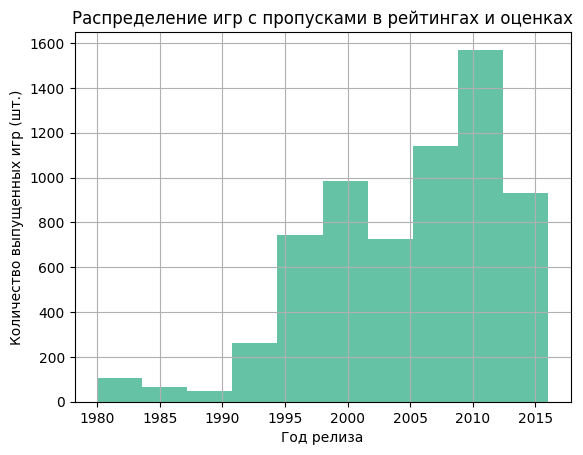

In [19]:
# задаем цвета для библиотеки seaborn
sns.set_palette("Set2")

# делаем срез данных по условию наличия пропусков в трех интересующих столбцах и рисуем гистограмму
data.query("critic_score.isna() & user_score.isna() & rating.isna()")[
    "year_of_release"
].hist()

# задаем названия осей и графика
plt.title("Распределение игр с пропусками в рейтингах и оценках")
plt.xlabel("Год релиза")
plt.ylabel("Количество выпущенных игр (шт.)");

К сожалению, много рейтингов и оценок отсутствует как раз за последние годы. Мы не можем заполнить пропуски рейтингов логичным значением и, так как их большое количество, не будем их удалять, чтобы использовать строки для изучения других метрик.

Обратим внимание на пропуски в столбце `rating`. Пропуски в этом столбце могут означать, что рейтинг пока не присвоен организацией ESRB, либо игра вообще не вышла на рынок США и Канады.

Заменим пропуски в этом столбце на `не присвоен`, чтобы лучше понять закономерности в этом столбце.

In [20]:
data["rating"] = data["rating"].fillna("не присвоен")

### Поиск и обработка дубликатов

**Поиск явных дубликатов.**

In [21]:
data.duplicated().sum()

0

Полностью повторяющихся строк нет. Попробуем найти неявные дубликаты, они могут появиться в столбцах с текстовым  типом данных.

Такие столбцы — `name`, `platform`, `genre` и `rating`.

Последние три столбца содержат категориальные данные. Выведем на экран уникальные значения в этих столбцах и проверим на наличие ошибок.

In [22]:
# уникальные значения столбца 'platform'
data["platform"].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [23]:
# уникальные значения столбца 'genre'
data["genre"].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [24]:
# уникальные значения столбца 'rating'
data["rating"].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'не присвоен'],
      dtype=object)

В этих трех столбцах все хорошо. Перейдем к столбцу `name`. Для начала переведем нет ли дубликатов, которые появились из-за разности регистра.

In [25]:
# сверим количество дубликатов значений в исходном стообце и если его перевести в нижник регистр
print(data["name"].duplicated().sum())
data["name"].str.lower().duplicated().sum()

5018


5018

Количество дубликатов равно, значит ошибок из-за регистра нет.

Попробуем найти игры дубли. Так как игра может быть выпущена на другой платформе и в разные годы, то сделаем сортировку по этим трем столбцам и посмотрим на дубликаты.

In [26]:
data[data[["name", "platform", "year_of_release"]].duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


Нашлась одна строка, отсортируем на этому названию и платформе

In [27]:
data.query('name == "Madden NFL 13" & platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Действительно, информация об игре задублировалась. Так как в первом варианте больше информации, то удалим второй.

In [28]:
data = data.drop_duplicates(
    subset=["name", "platform", "year_of_release"], keep="first"
)

### Добавление нового столбца

Добавим столбец суммарных продаж `total_sales`, который получим сложением столбцов:\
`na_sales` + `eu_sales` + `jp_sales` + `other_sales`

In [29]:
# расчет и добавление нового столбца
data["total_sales"] = (
    data["na_sales"] + data["eu_sales"] + data["jp_sales"] + data["other_sales"]
)

# вывод получившейся таблицы на экран
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,не присвоен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,не присвоен,31.38


### Промежуточный вывод

Мы провели предобработку данных:

* заменили типы столбцов на подходящие
* обработали пропуски: удалили строки с пропусками в столбце `year_of_release`, оставили пропуски в столбцах `critic_score`. В столбце `user_score` поменяли значение 'tbd' на пропуск NaN. В столбце `rating` заменили пропуски на 'не присвоен'.
* проверили датасет на наличие явных и неявных дубликатов (удалили лишнюю строку)
* рассчитали общие продажи по регионам по каждой игре и добавили результаты в новый столбец `total_sales`

 В трех столбцах, содержащих данные о рейтингах и отзывах обнаружились многочисленные пропуски. Это может быть связано с тем, что источники, из которых взяты данные, не содержат информации о данных играх, также возможно данных нет для менее популярных игр. Рейтинг ESRB, как созданный в Северной Америке, может охватывать только игры, ставшие популярными в этом полушарии, поэтому есть вероятность, что-либо рейтинг был пока не присвоен, либо игра вообще не выходила на рынок США и Канады.
 В столбце `year_of_release` пропуски могли появиться, из-за того, что столбец подгружался из источника, в которым заполнение года было необязательным или данных игр не было в источнике данных.

## Исследовательский анализ данных

### Выпуск игр по годам

Для изучения столбца `year_of_release` начала применим метод describe() и посмотрим распределение по годам на гистограмме

In [30]:
data["year_of_release"].describe()

count        16443.0
mean     2006.485921
std         5.875546
min           1980.0
25%           2003.0
50%           2007.0
75%           2010.0
max           2016.0
Name: year_of_release, dtype: Float64

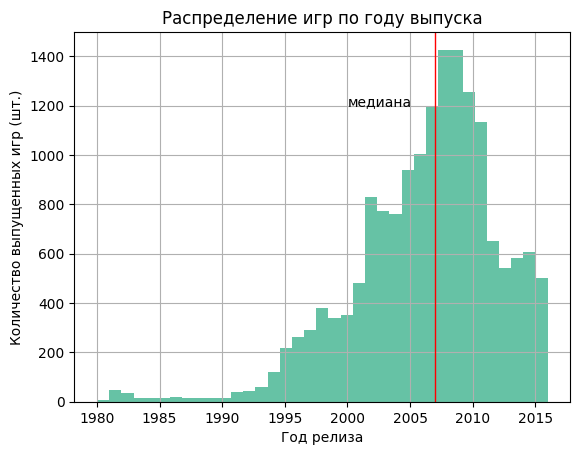

In [31]:
# вывод гистограммы на экран и оформление графика
data["year_of_release"].hist(bins=37)

# подписываем оси и заголовки
plt.title("Распределение игр по году выпуска")
plt.xlabel("Год релиза")
plt.ylabel("Количество выпущенных игр (шт.)")

# добавляем медиану
plt.axvline(data["year_of_release"].median(), color="r", linestyle="-", linewidth=1)
plt.text(2000, 1200, "медиана", rotation=0);

Итак, данные охватывают период от 1980 г. до 2016 г. При этом большинство игр выпущено после 1995 г.

Выведем топ 10 лет по количеству игр на экран.

In [32]:
# сортировка по уникальным значениям столбца year_of_release и вывод на экран топ-10
data["year_of_release"].value_counts().head(10)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: count, dtype: Int64

**Наблюдения:** Самые продуктивные по выпуску игр оказались нулевые. С отрывом лидируют 2008 и 2009. После 2009 наблюдается спад в количестве выпущенных игр. Возможно это связано с мировым экономическим кризисом, начавшимся в 2008 году.

Также видно, что после резкого спада в 2012 г. количество находится примерно на одном уровне. **Для исследования мы возьмем данные за последние 5 лет (2012-2016 гг.)**. Можно предположить, что на основании этого, более или менее стабильного для продаж периода, мы сможем выяснить актуальные для рынка закономерности.

### Продажи по платформам

Для изучения столбца `platform` сгруппируем данные по платформам и для каждой посчитаем сумму продаж.
Выведем топ 10 на экран.

In [33]:
# создание сводной таблицы по глобальным продажам на разных платформах
top_platforms = (
    data.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head(10)
)
top_platforms = top_platforms.reset_index()
top_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Визуализируем эти данные на графике для наглядности:

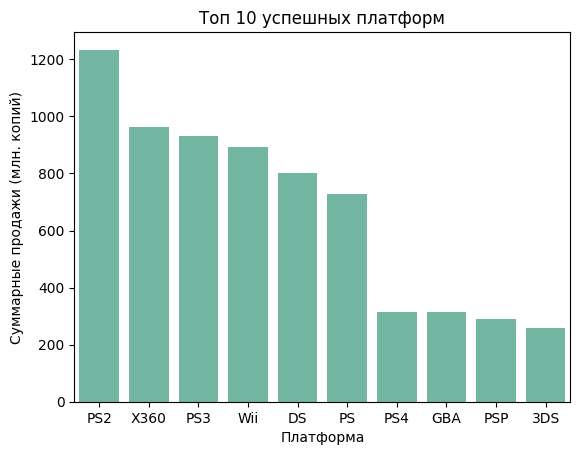

In [34]:
# создание и оформление графика
sns.barplot(data=top_platforms, x="platform", y="total_sales")

# подписываем оси и заголовки
plt.title("Топ 10 успешных платформ")
plt.xlabel("Платформа")
plt.ylabel("Суммарные продажи (млн. копий)");

**Наблюдения:** Больше всего продаж у игр на платформе PS2. Топ 6 значений резко отрываются от предыдущих. Построим для каждой из них распределение по годам.

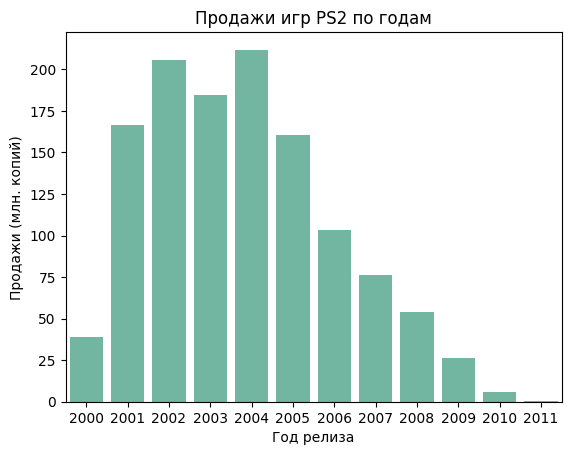

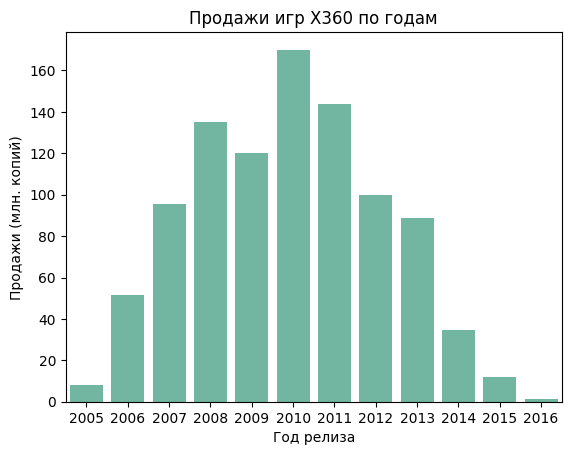

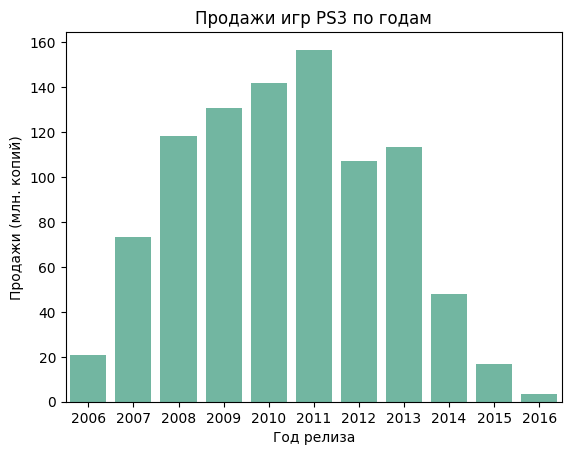

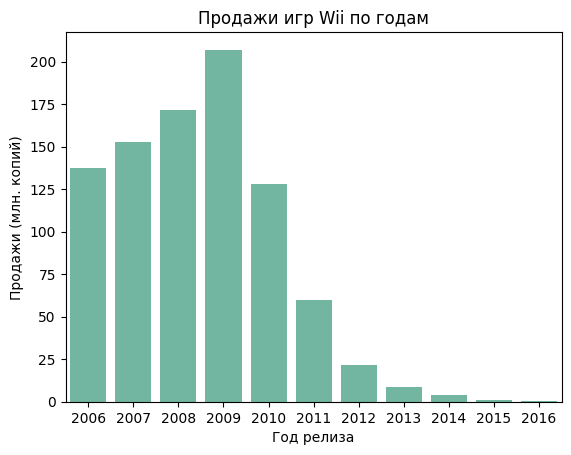

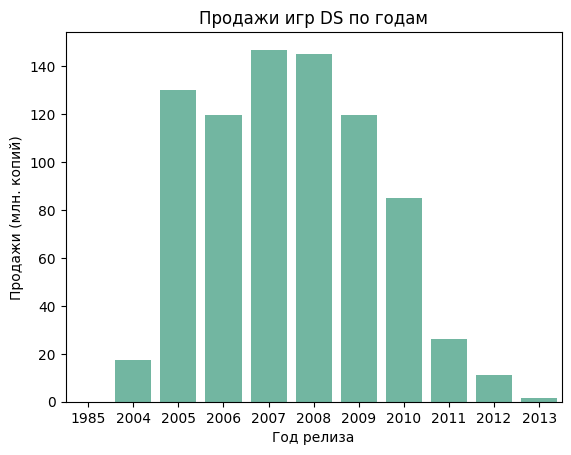

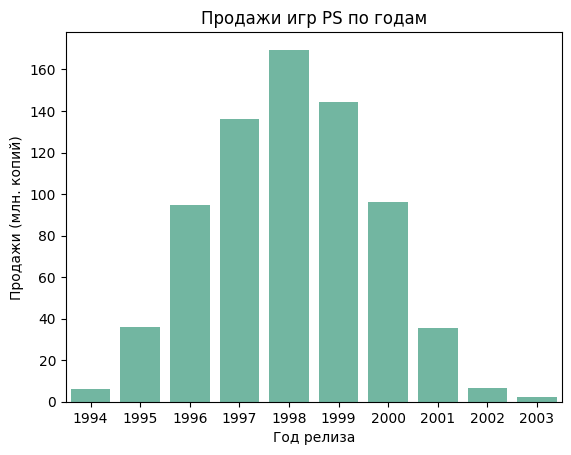

In [35]:
# создание листа с топ-6 успешных платформ за все время
top_six_platforms_list = (
    data.groupby("platform")["total_sales"].sum().sort_values(ascending=False).index[:6]
)

# цикл создает барплот распределений продаж по годам для каждой платформы из листа топ-6
for platform in top_six_platforms_list:
    data_slice = data.query("platform == @platform")
    sns.barplot(
        data=data_slice, x="year_of_release", y="total_sales", estimator=sum, ci=None
    )
    # подписываем оси и заголовки
    plt.title("Продажи игр " + platform + " по годам")
    plt.xlabel("Год релиза")
    plt.ylabel("Продажи (млн. копий)")

    plt.show()

У платформы DS можно заметить наличие строк за 1985 г., после которых идет 19 летний провал, уточним нет ли тут ошибки. Изучим эти строки:

In [36]:
# фильтрация по условию платформа — DS и год выпуска — 1985
data.query('platform == "DS" & year_of_release == 1985').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,не присвоен,0.02


Такая игра всего одна — Strongest Tokyo University Shogi DS. Уточним в интернете, когда в действительности вышла эта игра.

Судя по информации на нескольких сайтах, <a href="https://gamefaqs.gamespot.com/ds/937837-saikyou-toudai-shogi-ds/data">например тут</a>, игра вышла в 2007 г. Поправим данные в строке.

In [37]:
# исправление года для игры Strongest Tokyo University Shogi DS
data.loc[15957, "year_of_release"] = 2007

Теперь уточним средний активный период жизни платформы.
Для этого создадим сводную таблицу, где для каждой платформы выясним первый и последний годы активности.

In [38]:
platforms_active_years = data.pivot_table(
    index="platform", values="year_of_release", aggfunc=["min", "max"]
)
platforms_active_years.columns = ["first_year", "last_years"]
platforms_active_years.head()

,first_year,last_years
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,2004,2013


На основе столбцов рассчитаем количество лет существования платформ и посчитаем медиану по новому столбцу

In [39]:
platforms_active_years["years_total"] = (
    platforms_active_years["last_years"] - platforms_active_years["first_year"] + 1
)

platforms_active_years["years_total"].median()

7.0

**Наблюдения:** 

* В среднем активный период жизни платформы — 7 лет.
* Обычно продажи достигают своего пика на 4‐й - 6‐й год существования платформы
* У всех изученных платформ (топ-6 по продажам) к настоящему времени наблюдается спад продаж новых игр, а у `PS2`, `DS` и `PS` за последние годы вообще нет новых релизов.

### Создание среза данных за актуальный период

Выше мы уже изучили распределение выпуска игр по годам и решили остановиться на последних пяти годах (2012-2016 гг.) для построения прогноза на 2017 год.

In [40]:
# cоздадим срез данных и сохраним его в отдельную переменную.
actual_data = data.query("year_of_release > 2011")

### Поиск потенциально прибыльных платформ


Для начала узнаем какие платформы выпускали игры за последние 5 лет. Уточним самые продуктивные их них:

In [41]:
print(
    "Всего за последние 5 лет активных платформ:", len(actual_data["platform"].unique())
)
actual_data["platform"].value_counts()

Всего за последние 5 лет активных платформ: 11


platform
PS3     492
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: count, dtype: int64

Всего за последние пять лет 11 активных платформ. Выше мы уже выясняли самые прибыльные платформы и делали графики распределения продаж по годам. Сделаем аналогичный анализ по всем 11 платформам для актуального среза данных:

Выясним распределение по продажам:

In [42]:
# группировка по платформе и расчет суммы глобальных продаж
actual_platforms = (
    actual_data.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
)
actual_platforms = actual_platforms.reset_index()
actual_platforms

,platform,total_sales
0,PS4,314.14
1,PS3,288.78
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Визуализируем данные на графике.

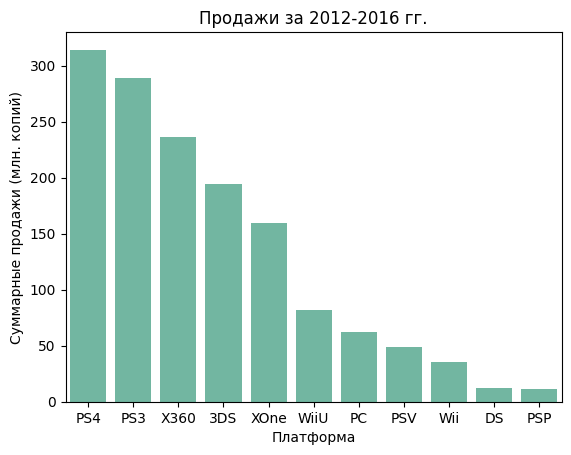

In [43]:
# создание и оформление графика
sns.barplot(data=actual_platforms, x="platform", y="total_sales")

# подписываем оси и заголовки
plt.title("Продажи за 2012-2016 гг.")
plt.xlabel("Платформа")
plt.ylabel("Суммарные продажи (млн. копий)");

В топ-5 продаж: `PS4`, `PS3`, `X360`, `3DS`, `XOne`

Теперь построим графики распределения продаж по годам для каждой платформы. Несмотря на то, что такие платформы как DS и PSP принесли значительно меньше дохода чем топ-5, не будем списывать их со счетов. Возможно это совсем новые платформы, которые только набирают обороты?

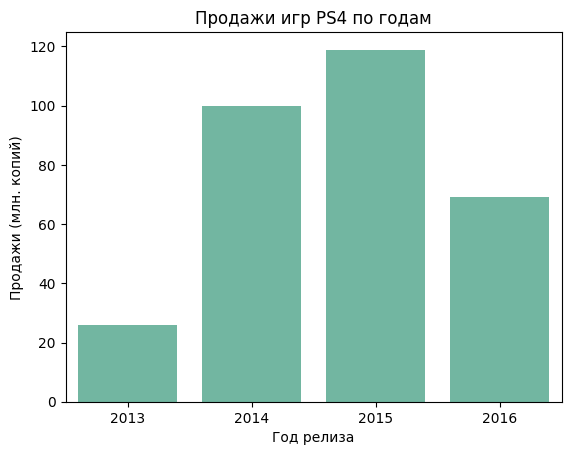

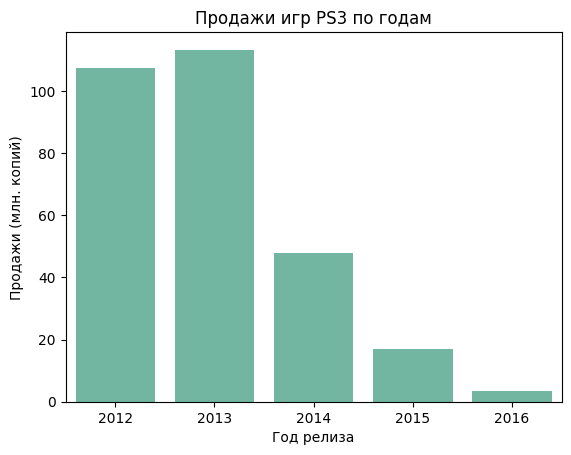

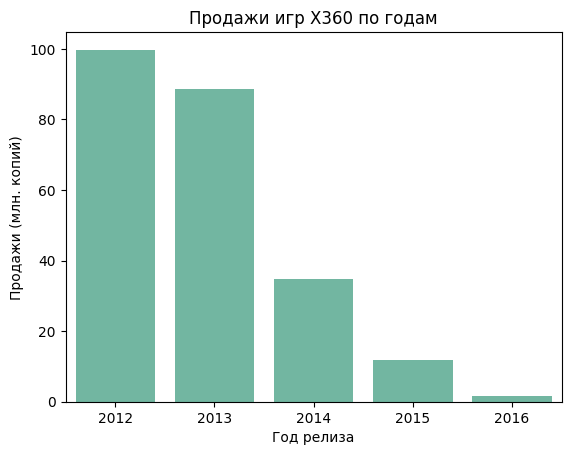

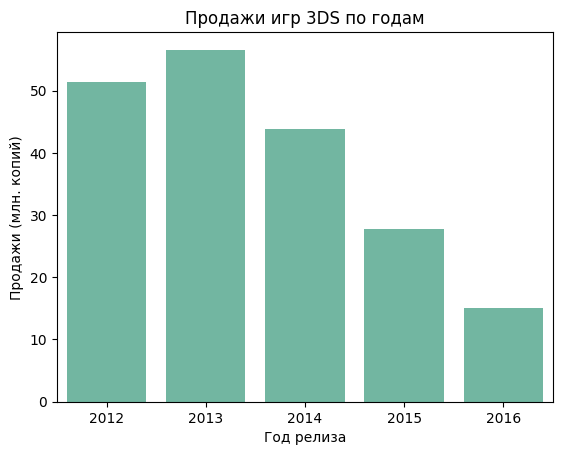

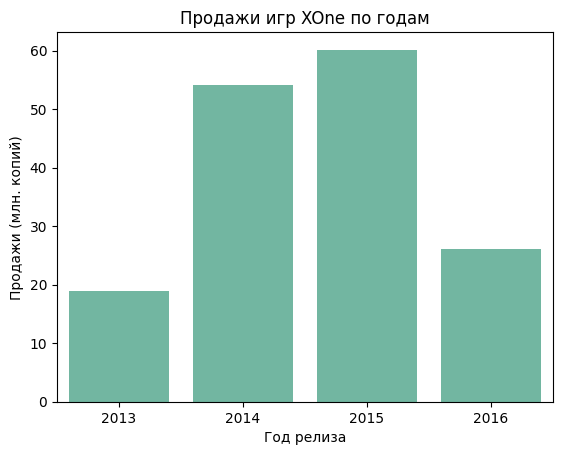

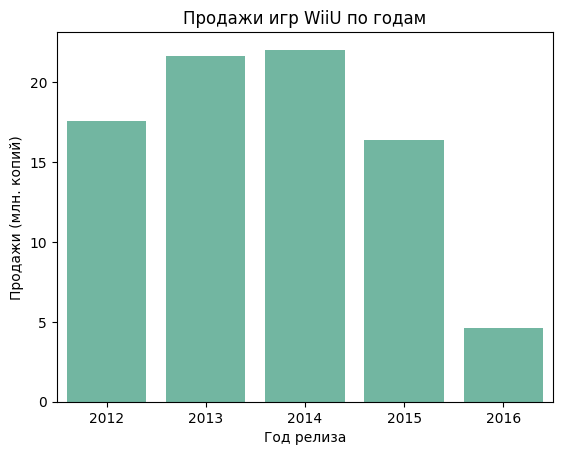

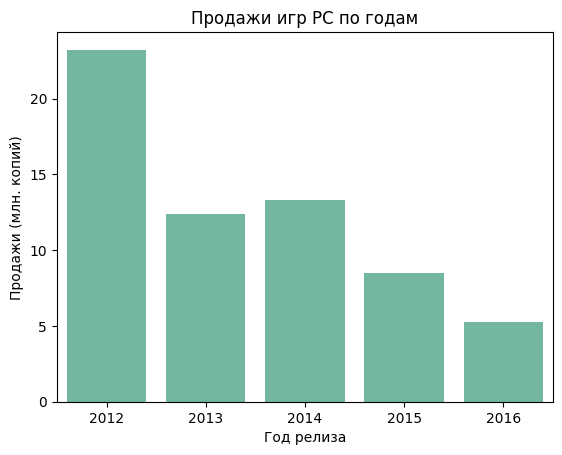

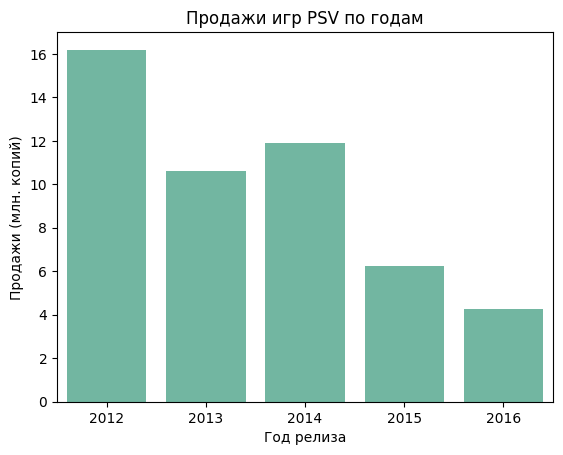

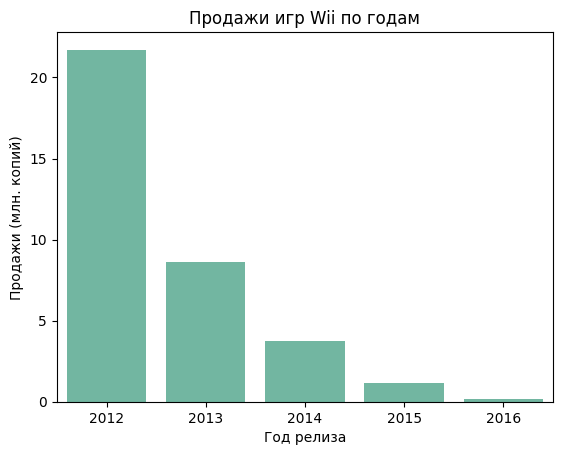

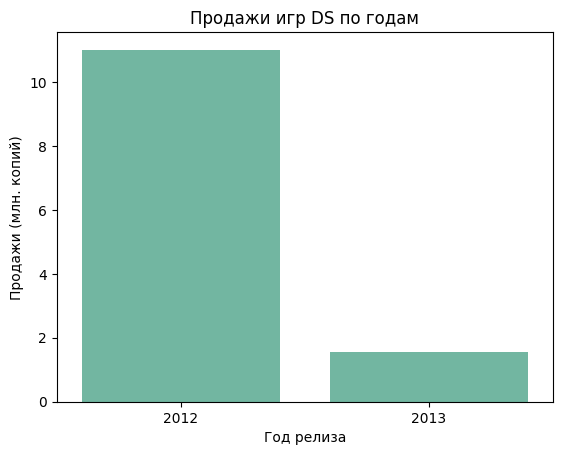

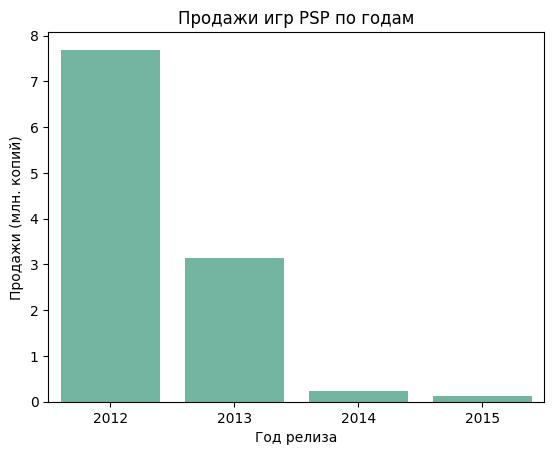

In [44]:
# создаем список названий платформ
platforms_list = (
    actual_data.groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .index
)

# цикл строит барплот по каждой платформе из списка с продажами игр по годам актуального временного периода
for platform in platforms_list:
    data_slice = actual_data.query("platform == @platform")
    sns.barplot(
        data=data_slice, x="year_of_release", y="total_sales", estimator=sum, ci=None
    )

    # подписываем оси и заголовки
    plt.title("Продажи игр " + platform + " по годам")
    plt.xlabel("Год релиза")
    plt.ylabel("Продажи (млн. копий)")

    plt.show()

**Наблюдения:** 

Поскольку данные за 2016 год могут быть неполными, для поиска потенциально прибыльных платформ наиболее важными являются высокие продажи в 2015 году и общая тенденция к увеличению продаж.

На основе этих критериев можно выделить такие платформы, как `PS4` и `XOne`.
У обеих платформ наблюдается рост продаж за последние годы. Уточним в каком году эти платформы появились:

In [45]:
print(
    "PS4 появилась в ", data.query('platform == "PS4"')["year_of_release"].min(), "году"
)
print(
    "XOne появилась в ",
    data.query('platform == "XOne"')["year_of_release"].min(),
    "году",
)

PS4 появилась в  2013 году
XOne появилась в  2013 году


**Вывод:**
PS4 и XOne появились в 2013 г, выше мы выяснили, что пик продаж платформ приходится в среднем на 4-6 год существования. Значит можно предположить, что у данных платформ впереди еще несколько лет успешных релизов.

### Визуализация по глобальным продажам игр в разбивке по платформам

Построим диаграммы размаха по глобальным продажам игр:

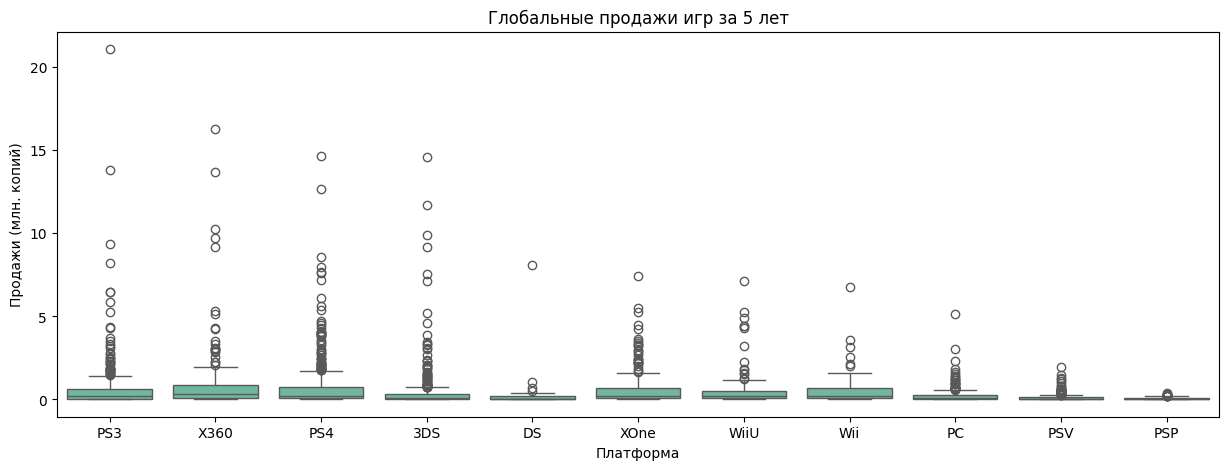

In [46]:
# создание и оформление графика
plt.figure(figsize=(15, 5))
sns.boxplot(data=actual_data, x="platform", y="total_sales")

# подписываем оси и заголовки
plt.title("Глобальные продажи игр за 5 лет")
plt.xlabel("Платформа")
plt.ylabel("Продажи (млн. копий)");

Обрежем многочисленные выбросы, задав лимит по оси `y` и отсортируем 'ящики' по мере убывания медиан.

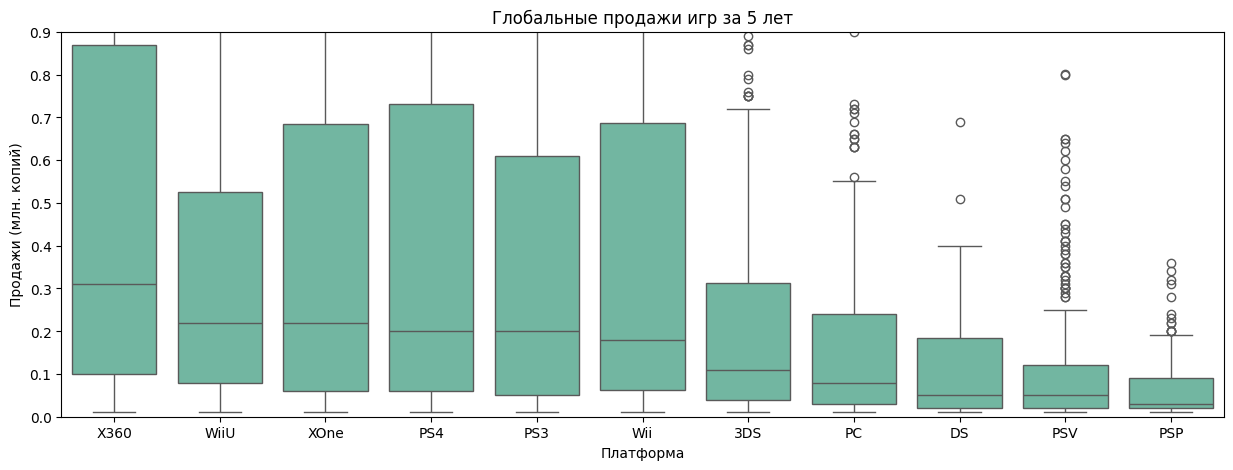

In [47]:
# создание порядка сортировки по медиане
my_order = (
    actual_data.groupby(by=["platform"])["total_sales"]
    .median()
    .sort_values(ascending=False)
    .index
)

# создание и оформление графика
plt.figure(figsize=(15, 5))
sns.boxplot(data=actual_data, x="platform", y="total_sales", order=my_order)
# задаем лимит по оси y
plt.ylim(0, 0.9)

# подписываем оси и заголовки
plt.title("Глобальные продажи игр за 5 лет")
plt.xlabel("Платформа")
plt.ylabel("Продажи (млн. копий)");

**Выводы:**\
За последние 5 лет в среднем больше всего дохода с глобальных продаж приносили игры под платформу Xbox 360.
Также платформ у всех были выбросы — игры хиты, которые приносили выручку, значительно большую чем в среднем.

### Зависимость продаж от отзывов

Для изучения зависимостей возьмем платформу из актуального периода, по которой у нас больше всего данных по отзывам. Вспомним, что в интересующих нас столбцах довольно много пропусков.

In [48]:
# расчет топ-5 платформ по количеству игр (строк) и вывод топ-5 на экран
(
    actual_data.query("~critic_score.isna() & ~user_score.isna()")
    .groupby("platform")["total_sales"]
    .count()
    .sort_values(ascending=False)
    .head()
)

platform
PS4     249
PS3     212
PC      197
X360    171
XOne    165
Name: total_sales, dtype: int64

Больше всего информации об отзывах по платформе PS4. Возьмем ее для изучения их влияния на продажи.

In [49]:
# создадим отдельные срезы по отзывам критиков и пользователей, отфильтруем пропуски
critic_score_slice = actual_data.query("~critic_score.isna()")[
    ["platform", "critic_score", "total_sales"]
].copy()
user_score_slice = actual_data.query("~user_score.isna()")[
    ["platform", "user_score", "total_sales"]
].copy()

# переведем тип столбца critic_score в int, это понадобится для подсчета корреляции
critic_score_slice["critic_score"] = critic_score_slice["critic_score"].astype("int64")

# сделаем отдельные срезы по отзывам для интересующей платформы PS4
ps4_critic_score_slice = critic_score_slice.query('platform == "PS4"')
ps4_user_score_slice = user_score_slice.query('platform == "PS4"')

Сначала исследуем **корреляцию продаж и отзывов критиков**:

* сделаем диаграмму рассеяния
* рассчитаем коэффициент корреляции Пирсона


Коэффициент Пирсона между продажами и отзывами критиков (платформа PS4) равен:  0.4065679020617816


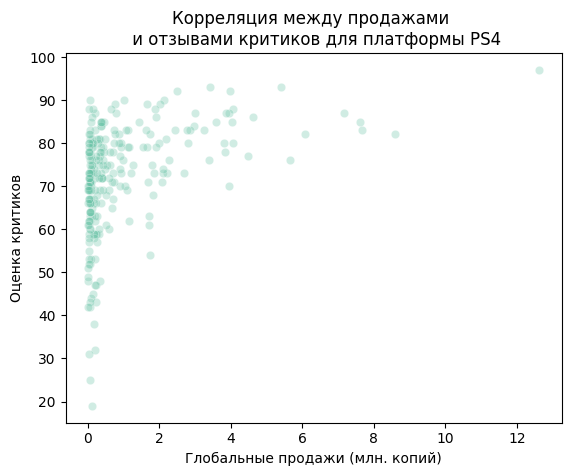

In [50]:
print()
# подсчет корреляции
print(
    "Коэффициент Пирсона между продажами и отзывами критиков (платформа PS4) равен: ",
    ps4_critic_score_slice["total_sales"].corr(ps4_critic_score_slice["critic_score"]),
)

# создание и оформление графика
sns.scatterplot(
    data=ps4_critic_score_slice, x="total_sales", y="critic_score", alpha=0.3
)

plt.title("Корреляция между продажами \n и отзывами критиков для платформы PS4")
plt.xlabel("Глобальные продажи (млн. копий)")
plt.ylabel("Оценка критиков");

Затем исследуем **корреляцию продаж и отзывов пользователей**:

* сделаем диаграмму рассеяния для топ 
* рассчитаем коэффициент корреляции Пирсона


Коэффициент Пирсона между продажами и отзывами пользователей (платформа PS4) равен: -0.03195711020455643


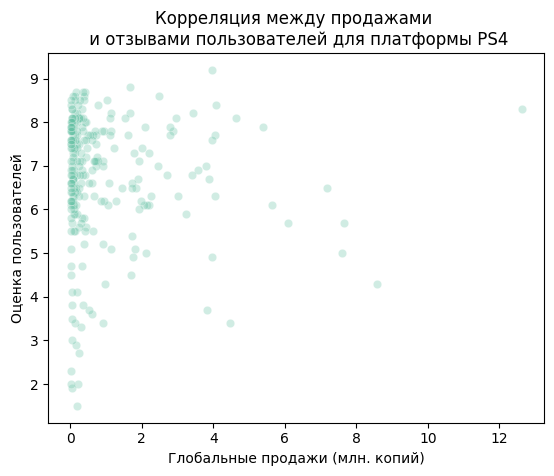

In [51]:
print()
# подсчет корреляции
print(
    "Коэффициент Пирсона между продажами и отзывами пользователей (платформа PS4) равен:",
    ps4_user_score_slice["total_sales"].corr(ps4_user_score_slice["user_score"]),
)

# создание и оформление графика
sns.scatterplot(data=ps4_user_score_slice, x="total_sales", y="user_score", alpha=0.3)

plt.title("Корреляция между продажами \n и отзывами пользователей для платформы PS4")
plt.xlabel("Глобальные продажи (млн. копий)")
plt.ylabel("Оценка пользователей");

**Выводы:**

Мы изучили зависимость между продажами и отзывами для платформы PS4. Можно сделать следующие выводы:

* между продажами и отзывами критиков существует корреляция, но не слишком сильная (0.4).
* между продажами и отзывами пользователей явной зависимости нет (-0.03).

По диаграмме можно заметить, что игры "хиты", которые принесли самую большую прибыль, всегда высоко оценены критиками, но могут получить среднюю оценку пользователей.

---

**Уточним, повторяется ли эта тенденция на других платформах:**
 
* сделаем диаграммы рассеяния для топ-5 активных платформ (не включая выше изученную PS4)
* рассчитаем коэффициент корреляции Пирсона





Коэффициент Пирсона между продажами игр на  PS3 и отзывами критиков  0.33415175755098564
Коэффициент Пирсона между продажами игр на PS3 и отзывами пользователей  -0.006205767686051493


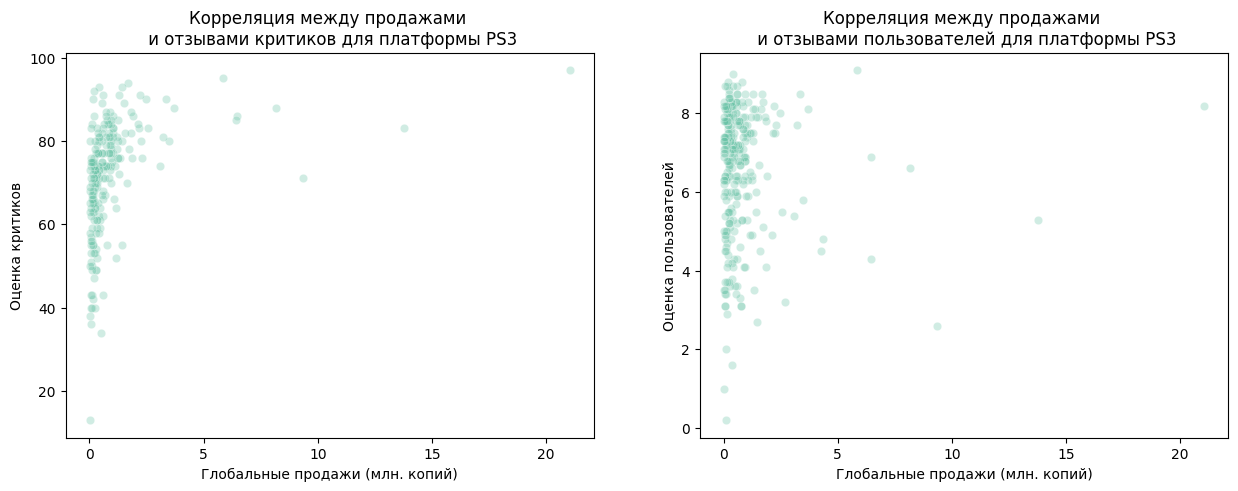





Коэффициент Пирсона между продажами игр на  X360 и отзывами критиков  0.36057348885073387
Коэффициент Пирсона между продажами игр на X360 и отзывами пользователей  0.006163978646213357


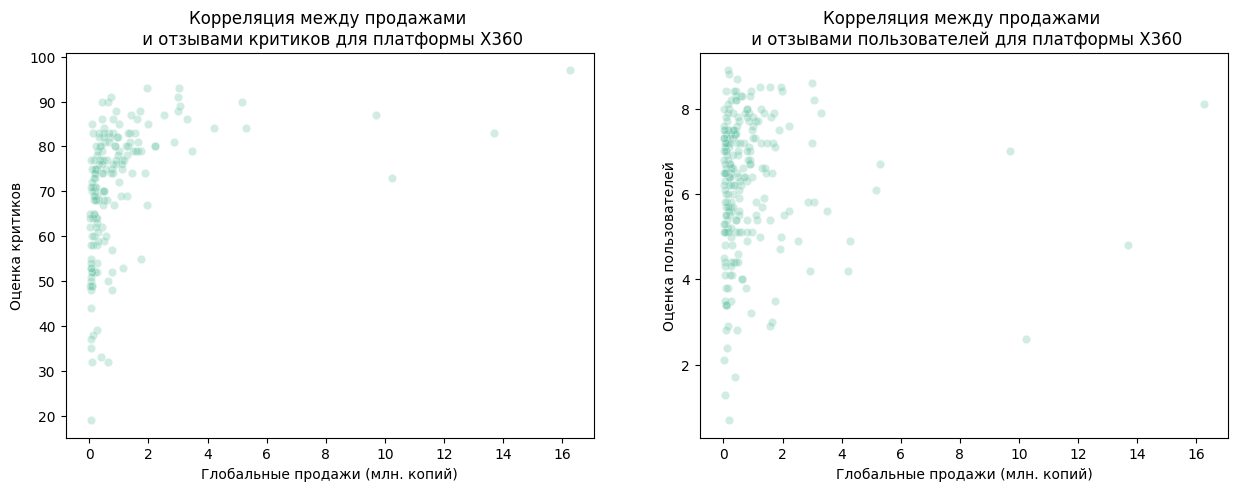





Коэффициент Пирсона между продажами игр на  3DS и отзывами критиков  0.32080286953607845
Коэффициент Пирсона между продажами игр на 3DS и отзывами пользователей  0.19758263411038596


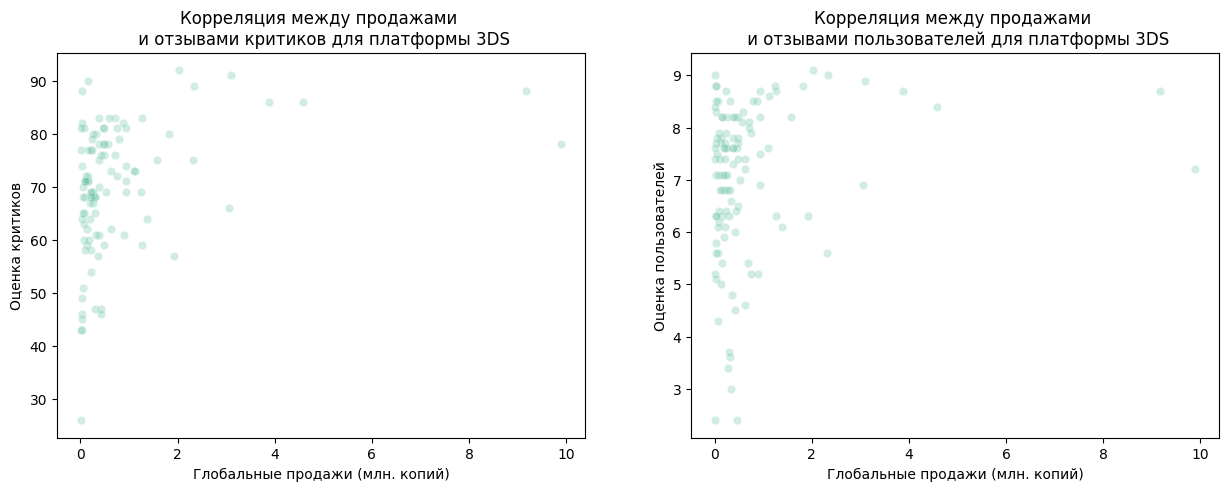





Коэффициент Пирсона между продажами игр на  XOne и отзывами критиков  0.41699832800840164
Коэффициент Пирсона между продажами игр на XOne и отзывами пользователей  -0.06892505328279415


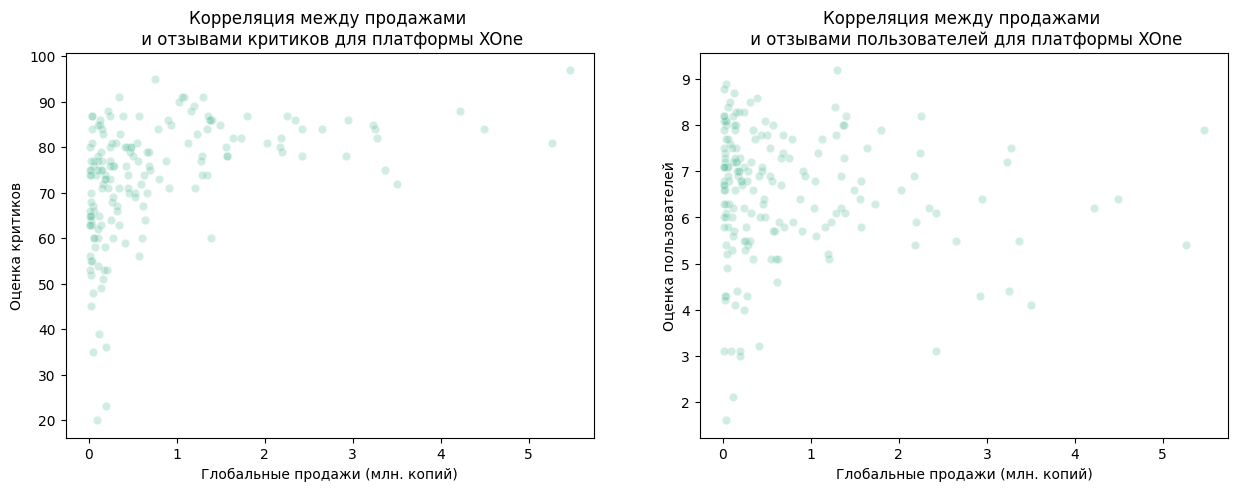





Коэффициент Пирсона между продажами игр на  WiiU и отзывами критиков  0.3483797601201749
Коэффициент Пирсона между продажами игр на WiiU и отзывами пользователей  0.4002190202148617


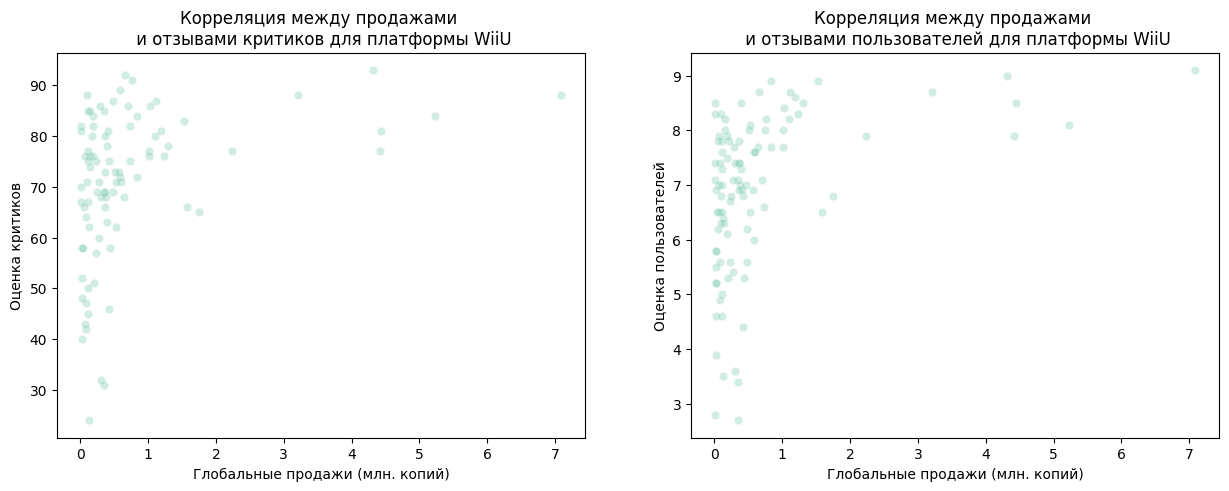

In [52]:
# создание листа топ-5 активных платформ (не включая PS4)
cor_platforms_list = (
    actual_data.groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .index[1:6]
)


# цикл создает строку с 2-мя графиками по каждой платформы из цикла
for platform in cor_platforms_list:

    data_slice1 = critic_score_slice.query("platform == @platform")
    data_slice2 = user_score_slice.query("platform == @platform")

    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)

    sns.scatterplot(
        ax=axes[0], data=data_slice1, x="total_sales", y="critic_score", alpha=0.3
    )
    axes[0].set_title(
        "Корреляция между продажами \n и отзывами критиков для платформы " + platform
    )
    axes[0].set_xlabel("Глобальные продажи (млн. копий)")
    axes[0].set_ylabel("Оценка критиков")

    sns.scatterplot(
        ax=axes[1], data=data_slice2, x="total_sales", y="user_score", alpha=0.3
    )
    axes[1].set_title(
        "Корреляция между продажами \n и отзывами пользователей для платформы "
        + platform
    )
    axes[1].set_xlabel("Глобальные продажи (млн. копий)")
    axes[1].set_ylabel("Оценка пользователей")

    print("\n\n\n")
    print(
        "Коэффициент Пирсона между продажами игр на ",
        platform,
        "и отзывами критиков ",
        data_slice1["total_sales"].corr(data_slice1["critic_score"]),
    )
    print(
        "Коэффициент Пирсона между продажами игр на",
        platform,
        "и отзывами пользователей ",
        data_slice2["total_sales"].corr(data_slice2["user_score"]),
    )

    plt.show()

**Выводы:**

Изучили зависимости продаж и отзывов по 5 активным платформам за актуальный период и сравнили с выводами по платформе PS4, которые делали ранее:

Результаты получились похожими:
* между продажами и отзывами критиков существует слабая корреляция (0.32-0.41, а у PS4 0.4).
* между продажами и отзывами пользователей явной зависимости нет. Выделяется платформа WiiU с более выраженной корреляцией (0.4)

Тем не менее на графиках видна одна закономерность: игры с оценками ниже среднего редко достигают высоких продаж (> 0.5 млн. копий).

### Распределение игр по жанрам

Для изучения распределения игр по жанрам сделаем сводную таблицу по жанрам за последние 5 лет, в которой для каждого жанра посчитаем:
* общую прибыль;
* среднюю прибыль с продажи игры;
* количество игр данного жанра.

In [53]:
# создание сводной таблицы
genres_pivot = actual_data.pivot_table(
    index="genre", values="total_sales", aggfunc=["sum", "mean", "count"]
)
# переименование столбцов
genres_pivot.columns = ["total_sales", "sales_mean", "total_count"]
# вывод таблицы на экран с сортировкой по общей прибыли
genres_pivot.sort_values(by="total_sales", ascending=False)

,total_sales,sales_mean,total_count
genre,,,
Action,441.12,0.427856,1031
Shooter,304.73,1.296723,235
Role-Playing,192.80,0.521081,370
Sports,181.06,0.678127,267
Misc,85.04,0.442917,192
Platform,61.00,0.717647,85
Racing,53.50,0.465217,115
Fighting,44.49,0.408165,109
Simulation,35.12,0.439000,80


Также визуализируем все три столбца на графике.

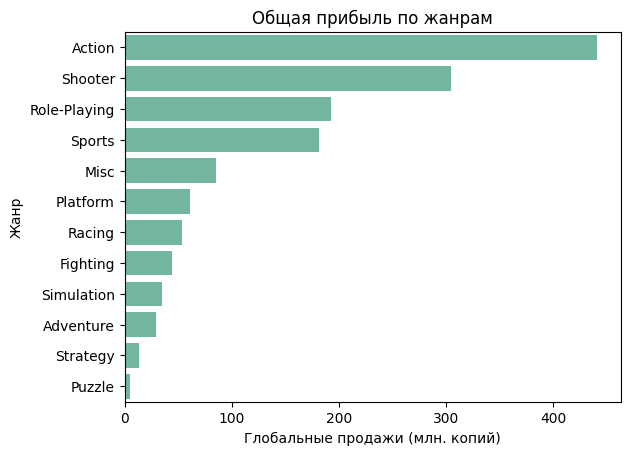

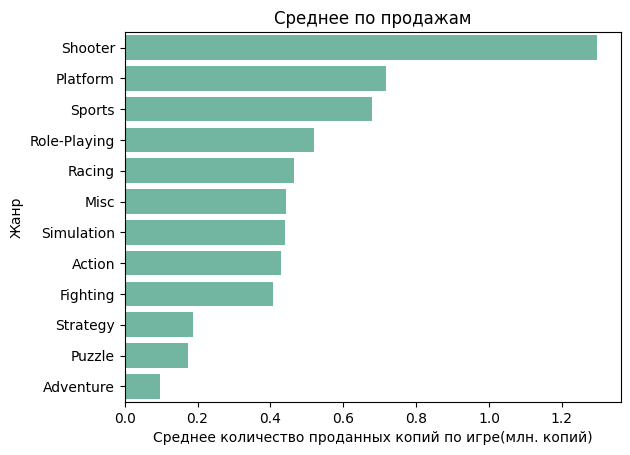

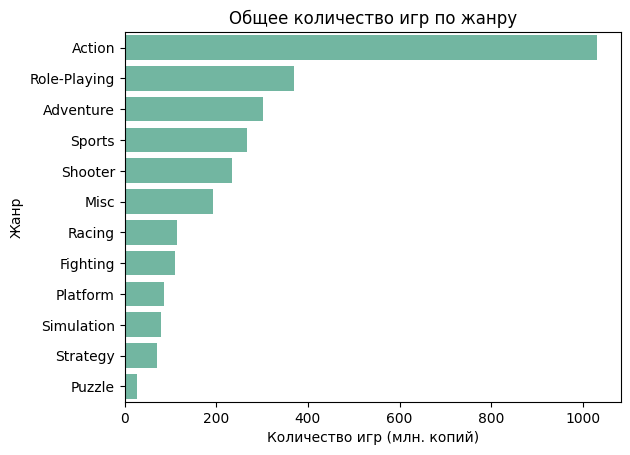

In [54]:
# восстановим столбец с названиями жанров
genres_pivot = genres_pivot.reset_index()

# создание барплотов по трем столбцам сводной таблицы
sns.barplot(
    data=genres_pivot.sort_values(by="total_sales", ascending=False),
    y="genre",
    x="total_sales",
)
plt.title("Общая прибыль по жанрам")
plt.xlabel("Глобальные продажи (млн. копий)")
plt.ylabel("Жанр")

plt.show()

sns.barplot(
    data=genres_pivot.sort_values(by="sales_mean", ascending=False),
    y="genre",
    x="sales_mean",
)

plt.title("Среднее по продажам")
plt.xlabel("Среднее количество проданных копий по игре(млн. копий)")
plt.ylabel("Жанр")

plt.show()

sns.barplot(
    data=genres_pivot.sort_values(by="total_count", ascending=False),
    y="genre",
    x="total_count",
)

plt.title("Общее количество игр по жанру")
plt.xlabel("Количество игр (млн. копий)")
plt.ylabel("Жанр");

Построим диаграммы размаха по продажам игр в разбивке на жанры:

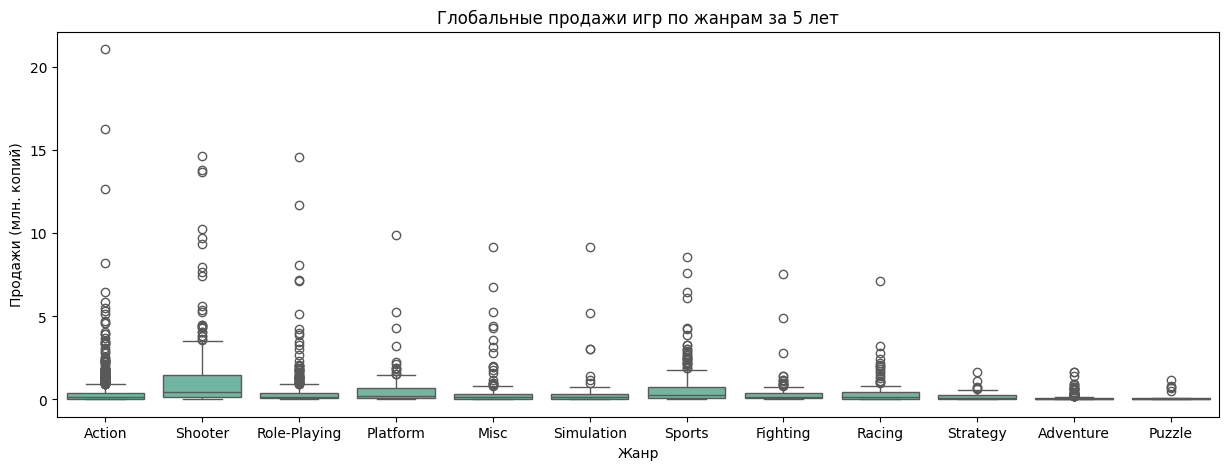

In [55]:
##создание и оформление графиков
plt.figure(figsize=(15, 5))
sns.boxplot(data=actual_data, x="genre", y="total_sales")

plt.title("Глобальные продажи игр по жанрам за 5 лет")
plt.xlabel("Жанр")
plt.ylabel("Продажи (млн. копий)");

Обрежем выбросы, задав лимит по оси `y`, отсортируем "ящики" по убыванию медианы

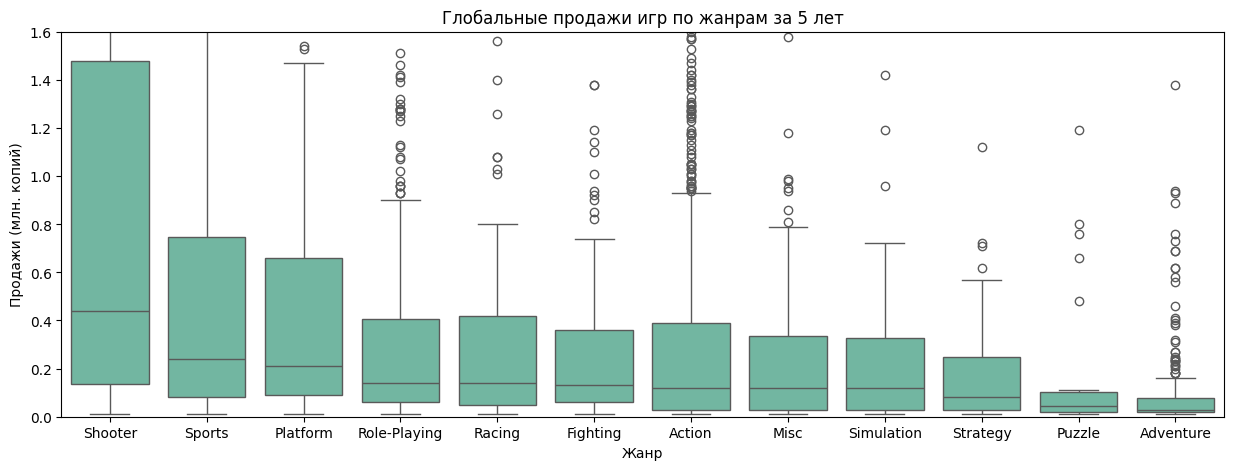

In [56]:
# создание порядка сортировки по медиане
my_order = (
    actual_data.groupby(by=["genre"])["total_sales"]
    .median()
    .sort_values(ascending=False)
    .index
)

# создание и оформление графика
plt.figure(figsize=(15, 5))

sns.boxplot(data=actual_data, x="genre", y="total_sales", order=my_order)
# задаем лимит по оси y
plt.ylim(0, 1.6)

# прописываем оси и названия
plt.title("Глобальные продажи игр по жанрам за 5 лет")
plt.xlabel("Жанр")
plt.ylabel("Продажи (млн. копий)");

In [57]:
# уточним медианы
actual_data.groupby(by=["genre"])["total_sales"].median().sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

**Выводы:**

* Можно выделить несколько самых прибыльных жанров, это `Shooter` `Sports` и `Platform`.
* Игры жанра `Shooter` резко выделяются от остальных.
* В свою очередь жанры  `Puzzle` и `Adventure` — самые непопулярные.
* Интересно, что несмотря на низкие прибыли, игр в жанре `Adventure` выпускается большое количество (на третьем месте в рейтинге).

### Промежуточный вывод

**Мы провели исследовательский анализ, и сделали следующие выводы:**

* Нулевые годы стали самыми продуктивными по количеству выпущенных игр. За ними следуют 2008 и 2009 годы. После резкого спада в 2012 году, количество выпускаемых игр остаётся примерно на том же уровне.

* В среднем активная жизнь игровой платформы составляет около 10 лет. Обычно продажи достигают своего пика на 4–6 год существования платформы. У всех изученных платформ в настоящее время наблюдается спад продаж новых игр, а у PS2, DS и PS за последние годы вообще не выходило новых релизов.

* Для исследования мы использовали данные за последние пять лет (с 2012 по 2016 год).

* Мы изучили продажи игровых платформ за текущий период и выделили PS4 и XOne как потенциально прибыльные.

* За последние пять лет в среднем наибольший доход с глобальных продаж принесли игры под платформу Xbox 360. У каждой платформы есть свои хиты, которые продаются значительно лучше остальных игр этой платформы.

* Мы обнаружили слабую зависимость между оценками критиков и продажами и выяснили, что явной связи между оценками пользователей и продажами нет. Эти зависимости были проверены как для популярной платформы PS4, так и для данных других пяти прибыльных платформ.

* Самыми прибыльными жанрами оказались Shooter, Sports и Platform, а наименее прибыльным — Adventure.

## Составление портрета пользователя каждого региона

Для составления портрета пользователя мы уточним популярные жанры и платформы для рынков Японии, Европы и Северной Америки, а также узнаем, влияет ли рейтинг ESRB на продажи.

###  Самые популярные платформы (топ-5)

Создадим сводную таблицу продаж по каждому региону с разбивкой по платформам.

In [58]:
# создание сводной таблицы
sales_pivot = actual_data.pivot_table(
    index="platform", values=["na_sales", "eu_sales", "jp_sales"], aggfunc="sum"
)

# вывод таблицы на экран
sales_pivot

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.85,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


Узнаем топ 5 популярных платформ на рынках:

In [59]:
# сортировка среза данных по убыванию продаж и вывод результатов на экран
print(
    "Топ 5 платформ на рынке Европы:",
    sorted(sales_pivot["eu_sales"].sort_values(ascending=False).head().index),
)
print(
    "Топ 5 платформ на рынке Северной Америки:",
    sorted(sales_pivot["na_sales"].sort_values(ascending=False).head().index),
)
print(
    "Топ 5 платформ на рынке Японии:",
    sorted(sales_pivot["jp_sales"].sort_values(ascending=False).head().index),
)

Топ 5 платформ на рынке Европы: ['3DS', 'PS3', 'PS4', 'X360', 'XOne']
Топ 5 платформ на рынке Северной Америки: ['3DS', 'PS3', 'PS4', 'X360', 'XOne']
Топ 5 платформ на рынке Японии: ['3DS', 'PS3', 'PS4', 'PSV', 'WiiU']


**Наблюдения:** Топ 5 платформ совпадают для Европы и Северной Америки, а вот на рынке Японии немного другое распределение. Там в топ-5 нет приставок ХBox: `X360` и `XOne`,  но есть `PSV` (PlayStation Vita
), `WiiU` (консоль от Nintendo), обе из которых разработаны в Японии.

--- 

Визуализируем доли топовых платформ для каждого рынка на круговой диаграмме.

In [60]:
# создание таблицы по каждому рынку, объединение долей платформ, не входящих в топ-5 в категорию 'остальные'
eu_sales_top5 = sales_pivot["eu_sales"].sort_values(ascending=False)[:5]
eu_sales_others = sales_pivot["eu_sales"].sort_values(ascending=False)[5:].sum()
eu_sales_top5["Остальные"] = eu_sales_others

na_sales_top5 = sales_pivot["na_sales"].sort_values(ascending=False)[:5]
na_sales_others = sales_pivot["na_sales"].sort_values(ascending=False)[5:].sum()
na_sales_top5["Остальные"] = na_sales_others

jp_sales_top5 = sales_pivot["jp_sales"].sort_values(ascending=False)[:5]
jp_sales_others = sales_pivot["jp_sales"].sort_values(ascending=False)[5:].sum()
jp_sales_top5["Остальные"] = jp_sales_others

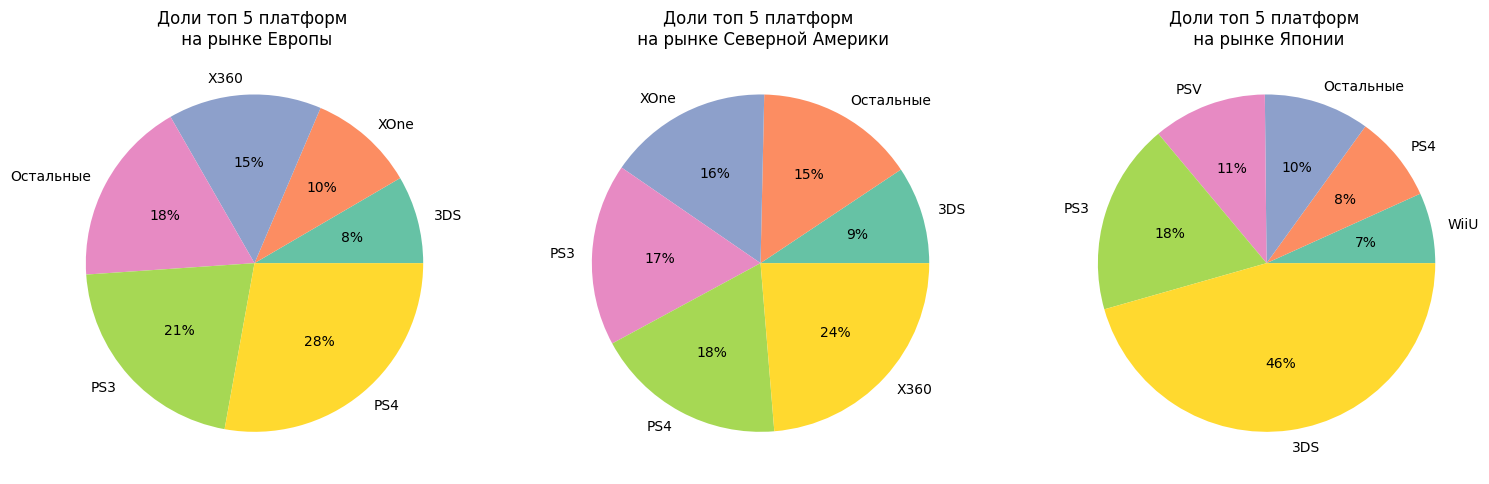

In [61]:
# создание и оформление графиков из получившихся выше таблиц и вывод их на экран в ряд
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)

ax = axes[0]
ax.pie(
    eu_sales_top5.sort_values(),
    autopct="%.0f%%",
    labels=eu_sales_top5.sort_values().index,
)
ax.set_title("Доли топ 5 платформ \n на рынке Европы")

ax = axes[1]
ax.pie(
    na_sales_top5.sort_values(),
    autopct="%.0f%%",
    labels=na_sales_top5.sort_values().index,
)
ax.set_title("Доли топ 5 платформ \n на рынке Северной Америки")

ax = axes[2]
ax.pie(
    jp_sales_top5.sort_values(),
    autopct="%.0f%%",
    labels=jp_sales_top5.sort_values().index,
)
ax.set_title("Доли топ 5 платформ \n на рынке Японии")

plt.show()

**Выводы:**

* В Европе самой популярной платформой является PS4, которую мы определили как потенциально прибыльную.
* В Северной Америке наиболее популярна платформа X360, также выбранная нами как потенциально прибыльная.
* В Японии лидирует 3DS от Nintendo. Мы ранее анализировали распределение продаж игр для этой платформы по годам и знаем, что в последнее время продажи постепенно снижаются. Учитывая популярность платформ этого производителя в Японии, стоит обратить внимание на новую консоль Nintendo Switch, представленную в октябре текущего года.

### Самые популярные жанры

Создадим сводную таблицу продаж по каждому региону с разбивкой по жанрам.

In [62]:
genres_pivot = actual_data.pivot_table(
    index="genre", values=["na_sales", "eu_sales", "jp_sales"], aggfunc="sum"
)

genres_pivot

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


Узнаем топ 5 жанров на рынках:

In [63]:
print(
    "Топ 5 жанров на рынке Европы:",
    sorted(genres_pivot["eu_sales"].sort_values(ascending=False).head().index),
)

print(
    "Топ 5 жанров на рынке Северной Америки:",
    sorted(genres_pivot["na_sales"].sort_values(ascending=False).head().index),
)

print(
    "Топ 5 жанров на рынке Японии:",
    sorted(genres_pivot["jp_sales"].sort_values(ascending=False).head().index),
)

Топ 5 жанров на рынке Европы: ['Action', 'Racing', 'Role-Playing', 'Shooter', 'Sports']
Топ 5 жанров на рынке Северной Америки: ['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']
Топ 5 жанров на рынке Японии: ['Action', 'Fighting', 'Misc', 'Role-Playing', 'Simulation']


**Наблюдения:**

The Action and Role-Playing genres are popular in all markets. \
In North America and Japan, the top five most popular genres also include Misc (Miscellaneous Games), which includes games that do not fit into other categories. Since this is not a separate genre, but a combination of different niche genres, it is logical to remove this category from the top 5.

Let's clarify the top 5 for Japan and North America:

In [64]:
# сортируем продажи в разбивке по жанрам для Северной Америки, выделяем топ-6 и удаляем из него Misc
na_top5 = genres_pivot["na_sales"].sort_values(ascending=False).head(6).index.to_list()
na_top5.remove("Misc")

# сортируем продажи в разбивке по жанрам для Японии, выделяем топ-6 и удаляем из него Misc
jp_top5 = genres_pivot["jp_sales"].sort_values(ascending=False).head(6).index.to_list()
jp_top5.remove("Misc")

# вывод новых топ-5 на экран
print(
    'Топ 5 жанров на рынке Северной Америки без учета категории Misc("разное"): \n',
    na_top5,
)
print()
print('Топ 5 жанров на рынке Японии без учета категории Misc("разное"): \n', jp_top5)

Топ 5 жанров на рынке Северной Америки без учета категории Misc("разное"): 
 ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Platform']

Топ 5 жанров на рынке Японии без учета категории Misc("разное"): 
 ['Role-Playing', 'Action', 'Simulation', 'Fighting', 'Shooter']


* В Северной Америке в пятерку лидеров вошел жанр `Platform`
* В Японии в пятерку лидеров вошел жанр `Shooter`

Визуализируем доли топовых жанров для каждого рынка на круговой диаграмме.

In [65]:
# создание таблицы по каждому рынку, объединение долей жанров, не входящих в топ5 в категорию 'остальные'
eu_genres_top5 = genres_pivot["eu_sales"].sort_values(ascending=False)[:5]
eu_genres_others = genres_pivot["eu_sales"].sort_values(ascending=False)[5:].sum()
eu_genres_top5["Остальные"] = eu_genres_others

na_genres_top5 = genres_pivot["na_sales"].sort_values(ascending=False)[:6]
na_genres_top5 = na_genres_top5[na_genres_top5.index != "Misc"]
na_genres_others = (
    genres_pivot["na_sales"].sort_values(ascending=False)[6:].sum()
    + genres_pivot["na_sales"]["Misc"]
)
na_genres_top5["Остальные"] = na_genres_others

jp_genres_top5 = genres_pivot["jp_sales"].sort_values(ascending=False)[:6]
jp_genres_top5 = jp_genres_top5[jp_genres_top5.index != "Misc"]
jp_genres_others = (
    genres_pivot["jp_sales"].sort_values(ascending=False)[6:].sum()
    + genres_pivot["jp_sales"]["Misc"]
)
jp_genres_top5["Остальные"] = jp_genres_others

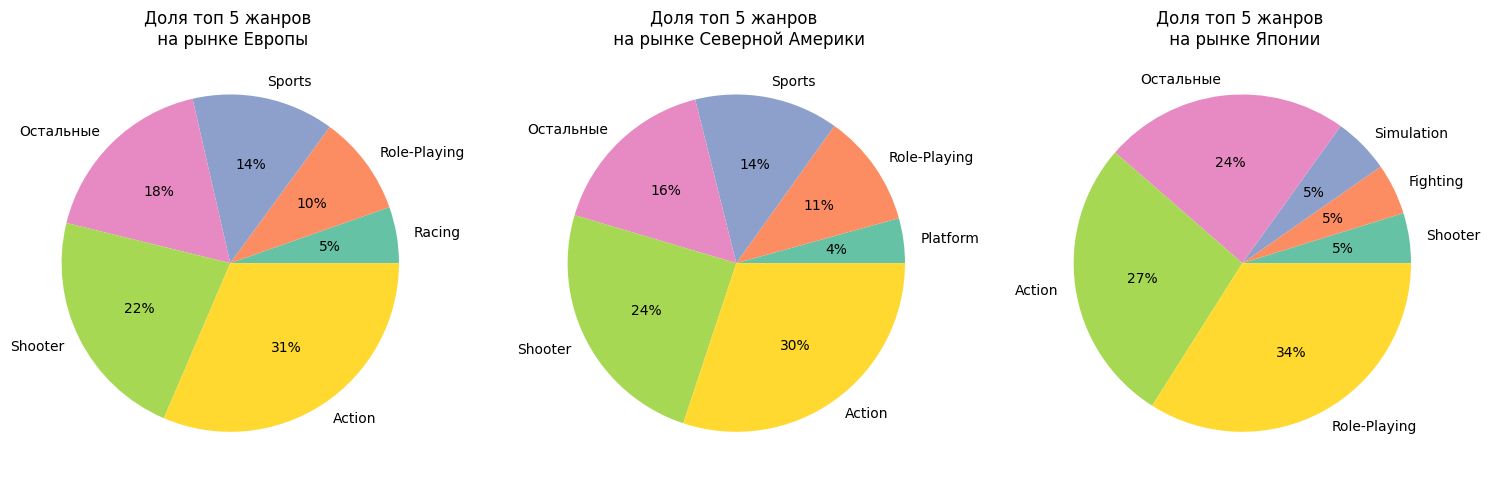

In [66]:
# создание и офрмление графиков из получившихся выше таблиц и вывод их на экран в ряд
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)

ax = axes[0]
ax.pie(
    eu_genres_top5.sort_values(),
    autopct="%.0f%%",
    labels=eu_genres_top5.sort_values().index,
)
ax.set_title("Доля топ 5 жанров \n на рынке Европы")

ax = axes[1]
ax.pie(
    na_genres_top5.sort_values(),
    autopct="%.0f%%",
    labels=na_genres_top5.sort_values().index,
)
ax.set_title("Доля топ 5 жанров \n на рынке Северной Америки")

ax = axes[2]
ax.pie(
    jp_genres_top5.sort_values(),
    autopct="%.0f%%",
    labels=jp_genres_top5.sort_values().index,
)
ax.set_title("Доля топ 5 жанров \n на рынке Японии")

plt.show()

**Выводы:**

* На рынках Северной Америки и Европы лидируют жанр `Action`. Также большую долю занимают жанры `Shooter` и `Sports`.
* В Японии самый популярный жанр — `Role-Playing` (RPG). Также большую долю рынка занимает жанр `Action`.

### Влияние рейтинга ESRB на продажи

Чтобы лучше понять, что такое рейтинг ESRB, обратимся к Википедии:

*Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.*

Уточним, что означают рейтинги:

* `«E»` («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"):

* `«E10+»` («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.


* `«T»` («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

* `«M»` («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.


Можно предположить, что такой рейтинг, может повлиять на продажи в Северной Америке, особенно более "взрослые" рейтинги `«T»` и `«M»`. Проверим так ли это:

Создадим сводную таблицу продаж по каждому региону с разбивкой по рейтингу. Напомним, что мы заполнили пропуски в столбце рейтингов значением `не присвоен`

In [67]:
# создание сводной таблицы и вывод ее на экран
rating_pivot = actual_data.pivot_table(
    index="rating", values=["na_sales", "eu_sales", "jp_sales"], aggfunc="sum"
)
rating_pivot

,eu_sales,jp_sales,na_sales
rating,,,
E,113.02,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
не присвоен,91.50,108.84,103.31


Визуализируем доли каждого рынка для каждого рейтинга.

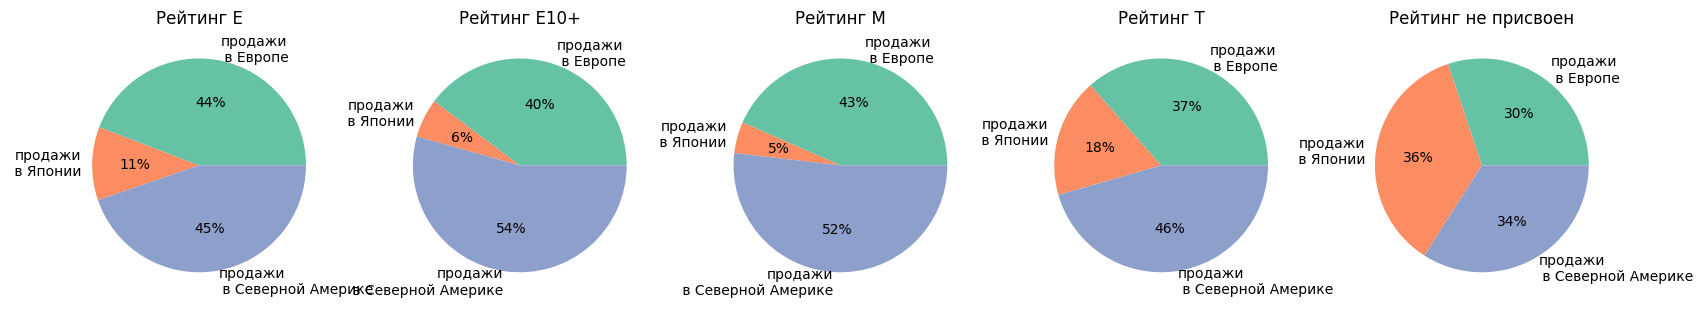

In [68]:
# задаем столбцам русские названия, так будет легче оформить график
rating_pivot.columns = [
    "продажи\n в Европе",
    "продажи\n в Японии",
    "продажи\n в Северной Америке",
]
# меняем местами строки и столбцы
rating_pivot = rating_pivot.transpose()

# создание и офрмление графиков
fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20, 10.5)

# цикл создает график для каждого рейтинга из таблицы rating_pivot
for i in range(5):
    rating_name = rating_pivot.columns[i]
    ax = axes[i]
    ax.pie(
        rating_pivot.iloc[:, i], labels=rating_pivot.iloc[:, 3].index, autopct="%.0f%%"
    )
    ax.set_title("Рейтинг " + rating_name)

plt.show()

Дополнительно изучим соотношение продаж в зависимости от рейтинга для каждого рынка. Для сравнения возьмем среднее количество копий на игру в каждой категории (рейтинге).

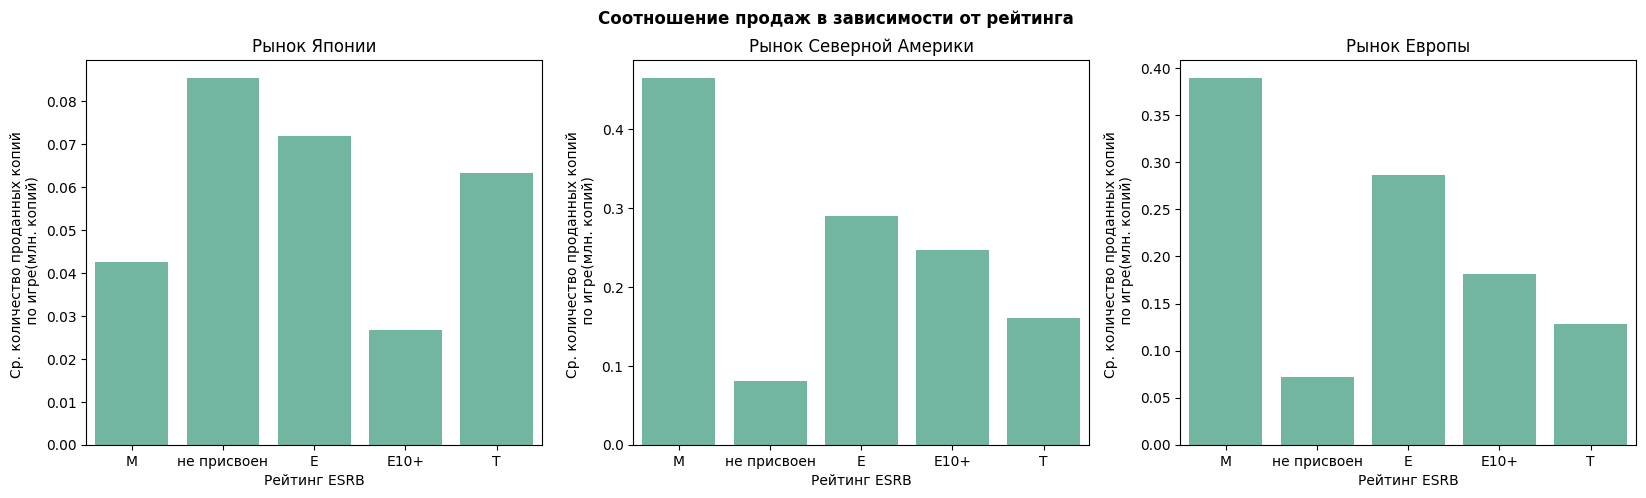

In [69]:
# создание и офрмление графиков
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 5)

fig.suptitle("Соотношение продаж в зависимости от рейтинга", fontweight="bold")

sns.barplot(ax=axes[0], data=actual_data, y="jp_sales", x="rating", ci=None)
axes[0].set_title("Рынок Японии")
axes[0].set_xlabel("Рейтинг ESRB")
axes[0].set_ylabel("Ср. количество проданных копий \n по игре(млн. копий)")

sns.barplot(ax=axes[1], data=actual_data, y="na_sales", x="rating", ci=None)
axes[1].set_title("Рынок Северной Америки")
axes[1].set_xlabel("Рейтинг ESRB")
axes[1].set_ylabel("Ср. количество проданных копий \n по игре(млн. копий)")

sns.barplot(ax=axes[2], data=actual_data, y="eu_sales", x="rating", ci=None)
axes[2].set_title("Рынок Европы")
axes[2].set_xlabel("Рейтинг ESRB")
axes[2].set_ylabel("Ср. количество проданных копий \n по игре(млн. копий)")

plt.show();

**Выводы:**


* В Европе и Северной Америке наблюдается схожая ситуация: игры с рейтингом «Для взрослых» (M) продаются лучше всего. Игры с рейтингом «Подросткам» (T), напротив, занимают последнее место по продажам в среднем на одну игру.
Это может быть связано с популярными жанрами на рынке, а также с тем, что решение о покупке игр для подростков принимают родители, а игры во «взрослом» жанре покупают сами взрослые.


* В Японии у большинства игр на рынке отсутствует рейтинг ESRB. Вероятно, эти игры не были выпущены на рынок Северной Америки. Среди тех игр, которые имеют рейтинг, лучше всего продаются игры с рейтингом «E» — «Для всех». Игры с рейтингом «E10+» — «От 10 лет и старше» занимают последнее место по продажам. Можно также предположить, что меньшее количество игрового контента с категорией «для взрослых» в Японии связано с меньшей долей игр жанра «шутер». В целом, для рынка Японии рейтинг ESRB не так актуален. Стоит уточнить, существует ли аналогичная система оценки в Японии.

Таким образом можно предположить, что рейтинг `Т` — «Подросткам» может влиять на продажи в Северной Америке и Европе. 

### Промежуточный вывод

Мы изучили, как популярность платформ и жанров зависит от рынка, а также определили долю игр по рейтингу ESRB для каждого рынка.

Вот портрет покупателя в зависимости от региона:
* В Японии популярны приставки японских компаний (Nintendo и PlayStation), игры в жанре RPG, а самый частый рейтинг — «E».
* Лидирующей платформой в Европе является PS4 (которую мы определили как потенциально прибыльную). Здесь предпочитают игры жанров Action и Shooter, а самый частый рейтинг — M.
* Самой популярной платформой в Северной Америке является X360 (также выбранная нами как потенциально прибыльная). Здесь также предпочитают игры жанров Action и Shooter, а самый частый рейтинг — М.

## Проверка гипотез

### Гипотеза №1

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

**Формулируем гипотезу:**

Будем сравнивать две выборки:

1 - пользовательские рейтинги игр на платформе `Xbox One`\
2 - пользовательские рейтинги игр на платформе `PC`

**Нулевая гипотеза** — среднее значение пользовательских рейтингов для игр на платформе `Xbox One` `=` среднему значению пользовательских рейтингов для игр на платформе `PC`

**Альтернативная гипотеза** — среднее значение пользовательских рейтингов для игр на платформе `Xbox One` `!=` среднему значению пользовательских рейтингов для игр на платформе `PC`

Таким образом альтернативная гипотеза — двусторонняя.

Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам — scipy.stats.ttest_ind()

In [70]:
sample_1 = actual_data.query('platform == "XOne" & ~user_score.isna()')["user_score"]
sample_2 = actual_data.query('platform == "PC" & ~user_score.isna()')["user_score"]
alpha = 0.05  # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

# проводим ttest для двух выборок
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print("p-значение:", results.pvalue)

# проверяем p-value
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Посчитаем среднее для выборок и сверим с результатами t-test

In [71]:
print("Среднее первой выборки: ", sample_1.mean())
print("Среднее второй выборки: ", sample_2.mean())
print("Отношение выборок: ", sample_1.mean() / sample_2.mean())

Среднее первой выборки:  6.521428571428572
Среднее второй выборки:  6.4286407766990274
Отношение выборок:  1.014433501256729


Средние выборок отличаются, но незначительно

**Вывод** 

Полученное значение p-value значительно больше заданного уровня значимости, есть основания предположить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Гипотеза №2

*Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

**Формулируем гипотезу:**

Будем сравнивать две выборки:

1 - пользовательские рейтинги игр жанра `Action`\
2 - пользовательские рейтинги игр жанра `Sports`

**Нулевая гипотеза** — среднее значение пользовательских рейтингов для игр жанра `Action` `=` среднему значению пользовательских рейтингов для игр жанра `Sports`

**Альтернативная гипотеза** — среднее значение пользовательских рейтингов для игр жанра `Action` `!=` среднему значению пользовательских рейтингов для жанра `Sports`

Таким образом альтернативная гипотеза — двусторонняя.

Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам — scipy.stats.ttest_ind()

In [72]:
sample_1 = actual_data.query('genre == "Action" & ~user_score.isna()')["user_score"]
sample_2 = actual_data.query('genre == "Sports" & ~user_score.isna()')["user_score"]
alpha = 0.05  # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

# проводим ttest для двух выборок
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print("p-значение:", results.pvalue)

# проверяем p-value
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Посчитаем среднее для выборок и сверим с результатами t-test

In [73]:
print("Среднее первой выборки: ", sample_1.mean())
print("Среднее второй выборки: ", sample_2.mean())
print("Отношение выборок: ", sample_1.mean() / sample_2.mean())

Среднее первой выборки:  6.825047801147227
Среднее второй выборки:  5.455670103092784
Отношение выборок:  1.251000825229178


Средние выборок действительно сильно отличаются.

**Вывод** 

На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

### Промежуточный вывод

**Гипотеза 1** — Средние пользовательские рейтинги жанров Action и Sports разные.\
**Результат проверки гипотезы:** Есть основания предположить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Гипотеза 2** — Средние пользовательские рейтинги платформ Xbox One и PC одинаковые\
**Результат проверки гипотезы:** Есть основания предположить, что средние пользовательские рейтинги жанров Action и Sports разные.


## Общий вывод

**`Предобработка`**

* заменили типы столбцов на подходящие
* обработали пропуски
* проверили датасет на наличие явных и неявных дубликатов (удалили лишнюю строку)
* рассчитали общие продажи по регионам по каждой игре и добавили результаты в новый столбец `total_sales`

---
**`Исследовательский анализ`**

* Нулевые годы стали самыми продуктивными по количеству выпущенных игр. За ними следуют 2008 и 2009 годы. После резкого спада в 2012 году, количество выпускаемых игр остаётся примерно на том же уровне.

* В среднем активная жизнь игровой платформы составляет около 10 лет. Обычно продажи достигают своего пика на 4–6 год существования платформы. У всех изученных платформ в настоящее время наблюдается спад продаж новых игр, а у PS2, DS и PS за последние годы вообще не выходило новых релизов.

* Для исследования мы использовали данные за последние пять лет (с 2012 по 2016 год).

* Мы изучили продажи игровых платформ за текущий период и выделили PS4 и XOne как потенциально прибыльные.

* За последние пять лет в среднем наибольший доход с глобальных продаж принесли игры под платформу Xbox 360. У каждой платформы есть свои хиты, которые продаются значительно лучше остальных игр этой платформы.

* Мы обнаружили слабую зависимость между оценками критиков и продажами и выяснили, что явной связи между оценками пользователей и продажами нет. Эти зависимости были проверены как для популярной платформы PS4, так и для данных других пяти прибыльных платформ.

* Самыми прибыльными жанрами оказались Shooter, Sports и Platform, а наименее прибыльным — Adventure.

---
**`Составили портрет пользователя каждого региона`**

Изучили зависимость популярности платформ и жанров от рынка, а так же уточнили для каждого рынка доли игр по рейтингу ESRB.

* В Японии популярны приставки японских компаний (Nintendo и PlayStation), игры в жанре RPG, а самый частый рейтинг — «E».
* Лидирующей платформой в Европе является PS4 (которую мы определили как потенциально прибыльную). Здесь предпочитают игры жанров Action и Shooter, а самый частый рейтинг — M.
* Самой популярной платформой в Северной Америке является X360 (также выбранная нами как потенциально прибыльная). Здесь также предпочитают игры жанров Action и Shooter, а самый частый рейтинг — М.

В целом, заметно сходство между рынками Северной Америки и Европы.

---
**`Выдвинули и проверили ряд гипотез:`**

* **1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые** 
— Есть основания предположить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* **2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.** — Есть основания предположить, что средние пользовательские рейтинги жанров Action и Sports разные.


---
**`Рекомендации`**

Таким образом, потенциально успешный продукт зависит от рынка, на котором планируется рекламная кампания:

* В Европе и Северной Америке можно выбрать игры жанров Shooter и Action для платформы PS4 в Европе и X360 в Северной Америке. Предпочтение стоит отдать играм с рейтингом M.

* Для Японии характерны приставки японских компаний (можно рассмотреть набирающую популярность PS4 или обратить внимание на новую платформу Nintendo Switch как потенциально перспективную в Японии), а также игры жанра RPG. На этом рынке можно не учитывать рейтинг ESRB, так как большинству игр на рынке он не присвоен. Игры с рейтингом «E» тоже продаются хорошо.

* Хотя исследование показало отсутствие связи между оценками пользователей и продажами и слабую связь между оценками критиков и продажами, следует избегать игр с оценками ниже среднего.